# Data Driven Models: Linear Regression Modelling Examples

### Last Class
- Linear regression diagnostics

### Goals for Today
- Construct linear regression models using the modelling process

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import poisson
from scipy.stats import norm
%matplotlib inline

print("packages imported")

packages imported


### Example - Galapogos plants
The `galapogos.csv` data describe the relationship between the number of plant species and several geographic variables on $30$ Galapagos islands.  Using area, elevation, nearest, scruz, and adjacent as the inputs, constuct a mathematical model of the species. 

**Problem Statement:**

Develop a model of the plant species, when we have information about area, elevation, nearest, scruz, and adjacent.

**Variables and Parameters:**


| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| regression coefficent for intercept | $\beta_0$ | - | parameter |
| geographical area | $X_1$ | - | variable |
| regression coefficient for area| $\beta_1$ | -| parameter |
| elevation | $X_2$ | -| variable |
| regression coefficient for elevation | $\beta_2$ | - | parameter |
| distance to nearest island | $X_3$ | - |  variable |
| regression coefficient for nearest | $\beta_3$ | -| parameter |
| distance to Santa Cruz island | $X_4$ | - |  variable |
| regression coefficient for scruz | $\beta_4$ | - | parameter |
| distance to adjacent island | $X_5$ | - | variable |
| regression coefficient for adjacent | $\beta_5$ | - | parameter |
| plant species | $Y$ | - | variable |
| error | $\epsilon$ | - | variable |


**Assumptions and Constraints:**
- the model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \varepsilon$
- the average value of the error is 0: i.e., $\mathbb{E}(\epsilon_i) = 0$ for all $i$
- the variance of the error is constant: i.e., $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- the error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- the error is independent for each $\epsilon_i$ for all $i$
- all species on the islands are in the data (i.e., there are no unidentified plant species)
- the other conditions (e.g., temperature, precipitation, animals) on the island remain constant
- the data is measured accurately

**Build Solutions:**

In [2]:
#import data 
galapogos = pd.read_csv('galapagos.csv')

galapogos = pd.DataFrame(galapogos)

galapogos.head()

,Unnamed: 0,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
0,Baltra,58,23,25.09,346,0.6,0.6,1.84
1,Bartolome,31,21,1.24,109,0.6,26.3,572.33
2,Caldwell,3,3,0.21,114,2.8,58.7,0.78
3,Champion,25,9,0.10,46,1.9,47.4,0.18
4,Coamano,2,1,0.05,77,1.9,1.9,903.82


In [3]:
X1 = galapogos[['Area','Elevation','Nearest','Scruz','Adjacent']]
Y1 = galapogos['Species']

In [4]:
X1 = sm.add_constant(X1)

reg_1 = sm.OLS(Y1,X1).fit()

summary_table=reg_1.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           6.84e-07
Time:                        17:12:47   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0682     19.154      0.369      0.7

The linear regression is therefore
$\hat{Y} = 7.0682 - 0.0239 X_1 + 0.3195 X_2 + 0.0091 X_3 - 0.2405 X_4 - 0.0748 X_5.$

**Analyze and Assess:**

We have a lot of assumptions on the error of the linear regression.  To check these, we will produce the diagnostic plots.

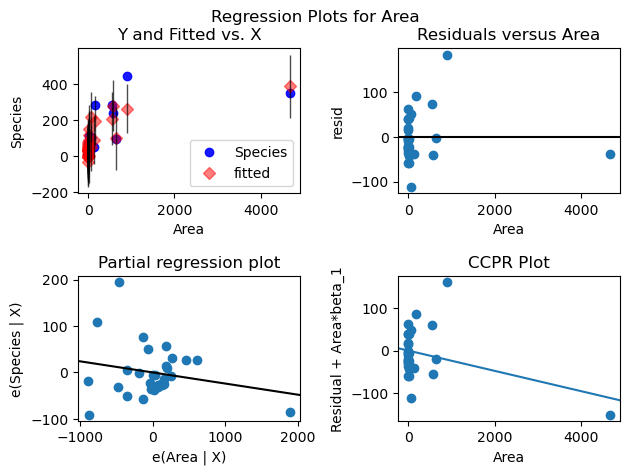

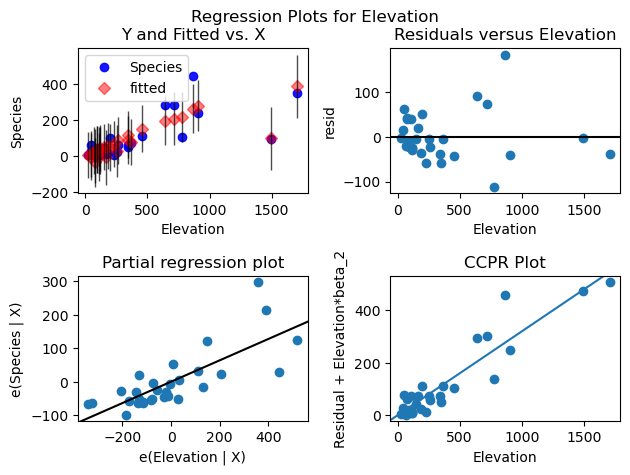

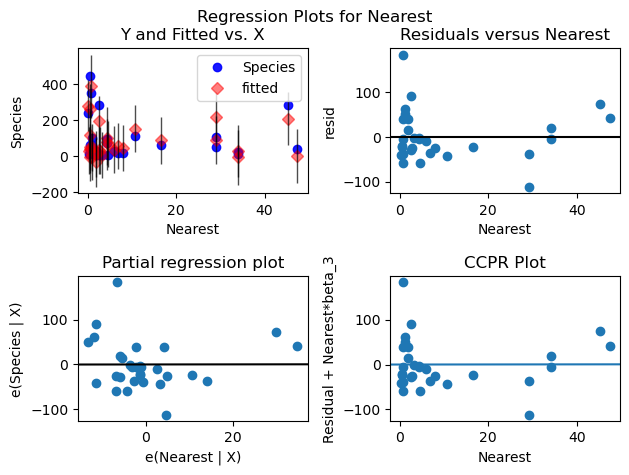

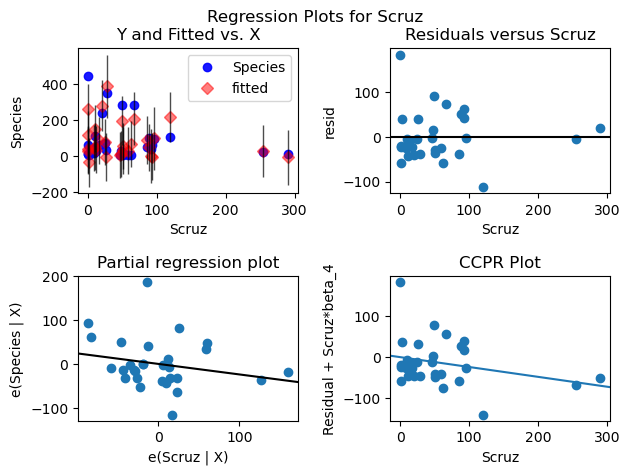

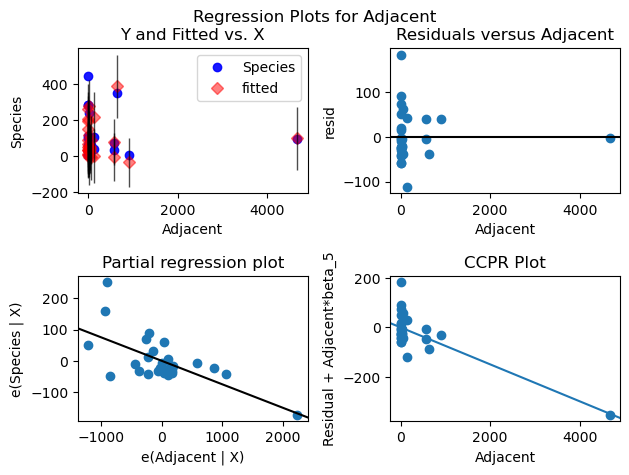

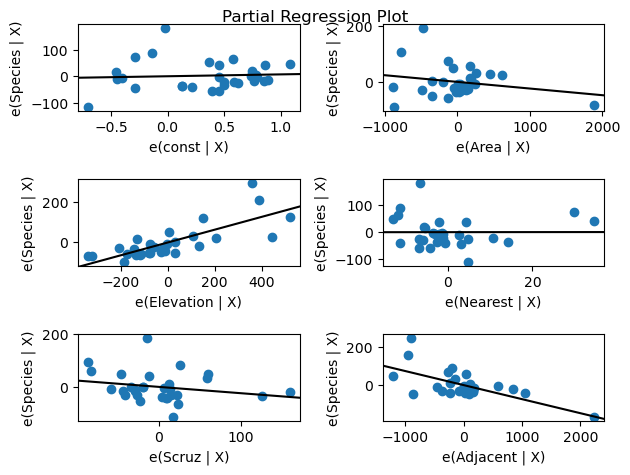

In [5]:
#Assumption: average value of the error is zero.
sm.graphics.plot_regress_exog(reg_1,"Area")
plt.show()

sm.graphics.plot_regress_exog(reg_1,"Elevation")
plt.show()

sm.graphics.plot_regress_exog(reg_1,"Nearest")
plt.show()

sm.graphics.plot_regress_exog(reg_1,"Scruz")
plt.show()

sm.graphics.plot_regress_exog(reg_1,"Adjacent")
plt.show()

## can just have all the partial regression plots together using:
## partial regression plots
sm.graphics.plot_partregress_grid(reg_1)
plt.show()

- most of the plots to check if the average value of the error is zero, look ok.  There are a couple that we may be concerned about: e.g., residuals vs area and residuals vs nearest.

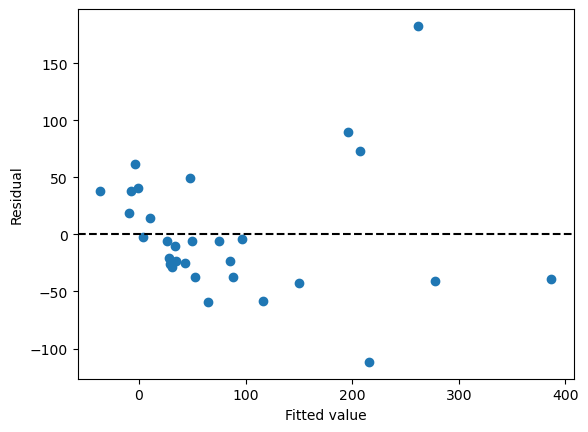

In [6]:
## variance is constant

## residual vs fitted plot 

#pull out fitted values from regression
fitted_y = reg_1.fittedvalues

residuals = reg_1.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

- the plot here looks like there may be a slight pattern to the points.  We are expecting random scatter, however, this plot may indicate that we have a violation of constant variance

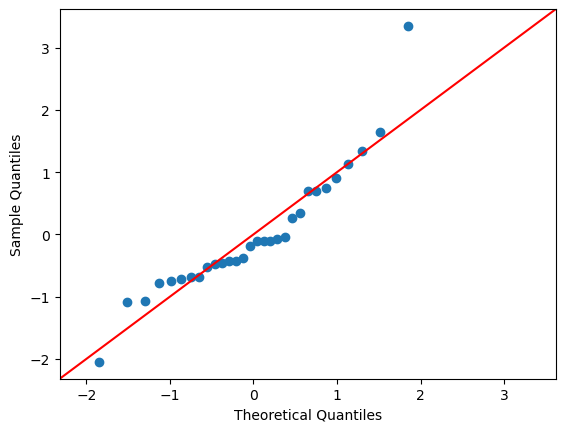

In [7]:
## Errors are normally distributed

## normal QQ plot

## pull out residuals from the model fitting
residuals = reg_1.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

- this plot overall looks okay.  It appears we may have some deviations away from normality, but it is roughly in line with other acceptable QQ plots. 

In [8]:
## Errors are independent

## Data is not time series data -- cannot run the residual vs index plot.

From the diagnostic plots, we may have some indications that the assumptions on the error are violated: namely that the mean of the error is zero and that the variance is constant.  We may want to look in to some other methods to be able to work with this data.

Although outside the scope of the course, there are several techniques to "stabilize the variance", which often will also "fix" some of the other diagnostic plots.  By "fix" here, we mean that the diagnostic plots become visually closer to the expected result if the error assumptions are valid. 

One method is to apply a transformation to either the output $Y$ or to one (or more) of the inputs $X_1, X_2, X_3, X_4,$ and/or $X_5.$  In this case, a transformation to the output $Y$ of $Y^* = 2(\sqrt{Y}-1),$ yields a good correction.  Here, the $Y^*$ comes from a Box-Cox optimization that is outside the scope of Math 360 (a Box-Tidwell optimization will yield transformations on the covariates).

To make the transformation, we can define `Y1 = 2*(np.sqrt(galapogos['Species'])-1)` and then rerun the linear regression protocol and re-check our diagnositic plots.  In Math 360, it is not expected for you to determine the appropriate transformations, however, you should be comfortable with applying given transformations, like the one above, to data. 

In [9]:
X2 = galapogos[['Area','Elevation','Nearest','Scruz','Adjacent']]
Y2 = 2*(np.sqrt(galapogos['Species'])-1)

X2 = sm.add_constant(X2)

reg_2 = sm.OLS(Y2,X2).fit()

summary_table=reg_2.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     17.29
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.87e-07
Time:                        17:12:51   Log-Likelihood:                -90.620
No. Observations:                  30   AIC:                             193.2
Df Residuals:                      24   BIC:                             201.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7838      1.743      2.745      0.0

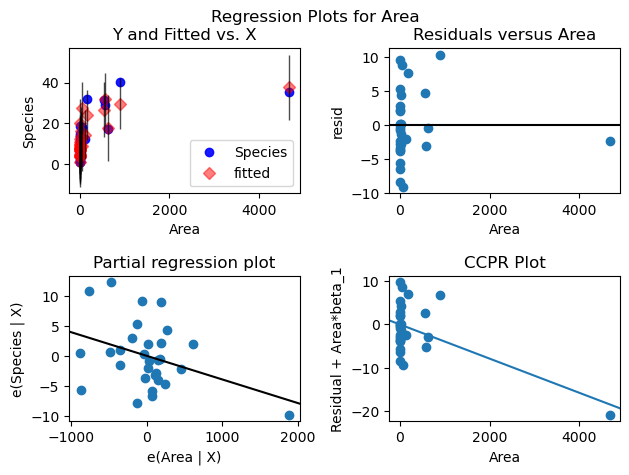

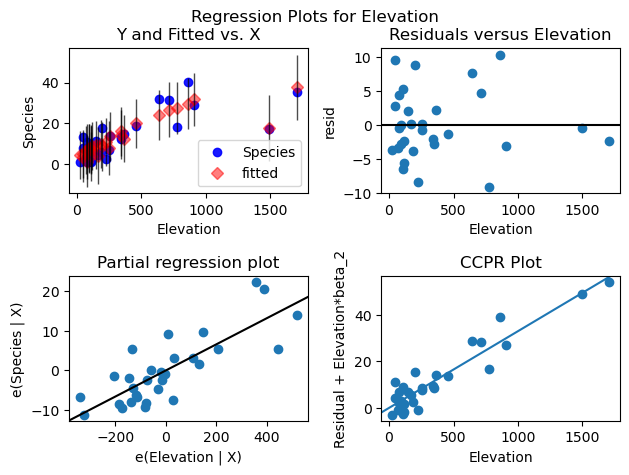

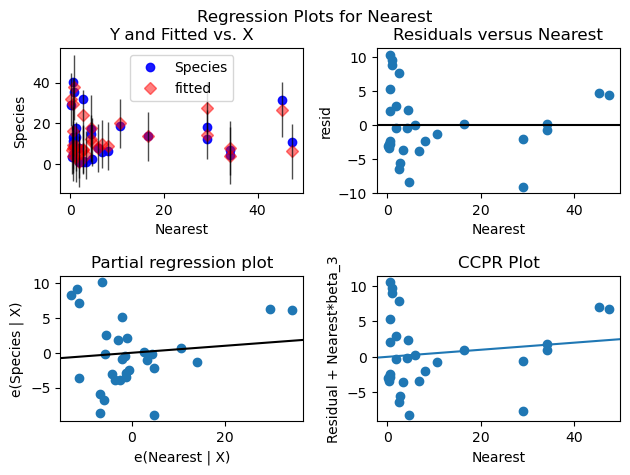

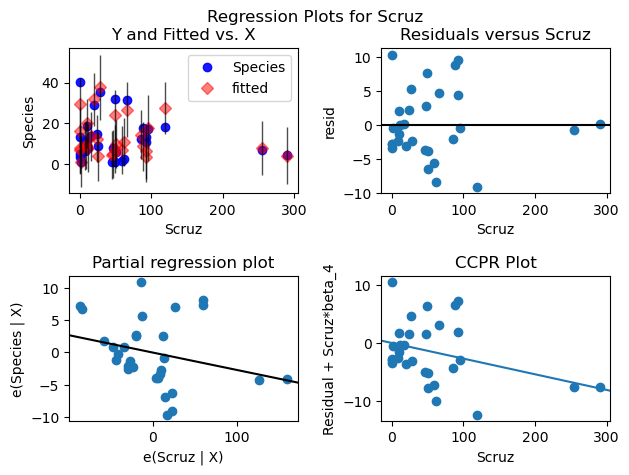

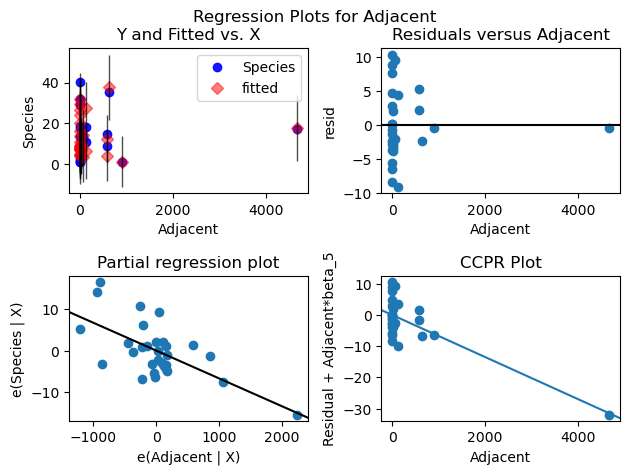

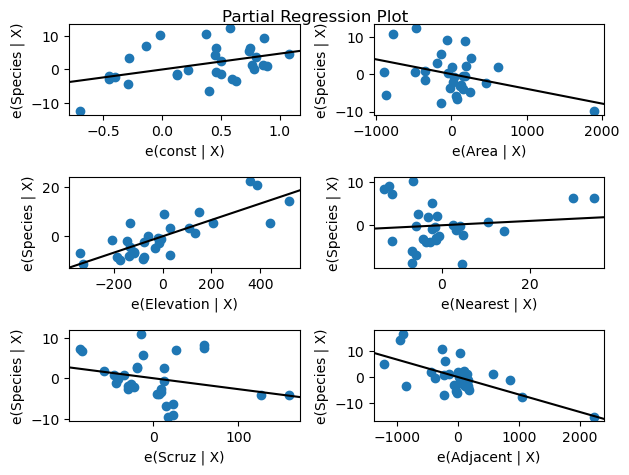

In [10]:
#Assumption: average value of the error is zero.
sm.graphics.plot_regress_exog(reg_2,"Area")
plt.show()

sm.graphics.plot_regress_exog(reg_2,"Elevation")
plt.show()

sm.graphics.plot_regress_exog(reg_2,"Nearest")
plt.show()

sm.graphics.plot_regress_exog(reg_2,"Scruz")
plt.show()

sm.graphics.plot_regress_exog(reg_2,"Adjacent")
plt.show()

## can just have all the partial regression plots together using:
## partial regression plots
sm.graphics.plot_partregress_grid(reg_2)
plt.show()

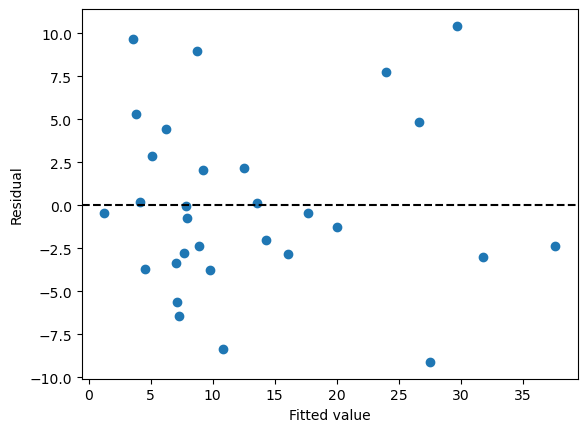

In [11]:
## variance is constant

## residual vs fitted plot 

#pull out fitted values from regression
fitted_y_2 = reg_2.fittedvalues

residuals_2 = reg_2.resid

plt.scatter(fitted_y_2,residuals_2)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

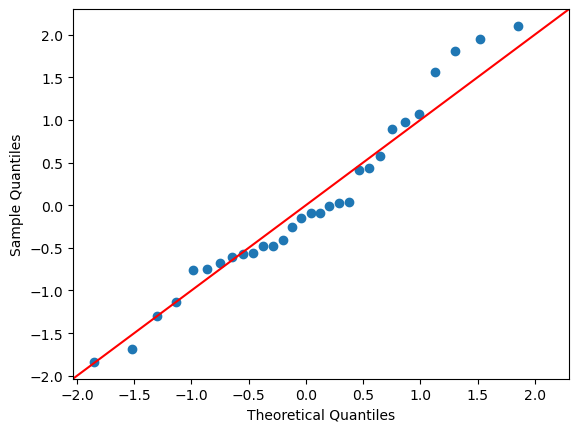

In [12]:
## Errors are normally distributed

## normal QQ plot

## pull out residuals from the model fitting
residuals_2 = reg_2.resid

sm.qqplot(residuals_2,fit=True, line="45")
plt.show()

**Remark:**  Applying a transformation does not necessarily mean that all of the violations we see will be "fixed".  However, by applying a transformation, we hoppefully are able to see *improvement* in the diagnostic plots.

In the case above, it does make the diagnostic plots look better, in particular, the residual vs fitted plot does not have a pattern in it anymore.  The partial regression plots also seem to indicate we may have some outliers and/or influential points.  Outliers, influential points, and high leverage points are outside the scope of Math 360, but understanding of these can help aid in linear regression and the analysis. 

We may also want to try to get more data for this regression.  We only have $30$ datapoints, one for each island in the study, it may be helpful to subdivide each island to have more data and/or more accurate data about the plant species on the islands.

We may also want to comment on the magnitude of the $\beta_i$ coefficients, as well as the $R^2_{adj}$ value in our analysis.

### Example - Insurance 

Insurance companies know that car speed has an effect on the stopping distance and they would like to have a model to predict a vehicle's stopping distance for a given speed.

They have a dataset called `speed.csv` that has $62$ observations under similar conditions. The speed is measured in km/h and the distance is measured in m.  Construct a mathematical model of the stopping distance.  

**Problem Statement:** 

Develop a model of a vehicle's stopping distance when given the speed

**Variables and Parameters:**


| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| regression coefficent for intercept | $\beta_0$ | m | parameter |
| speed | $X_1$ | km/h | variable |
| regression coefficient for speed| $\beta_1$ | m h /km| parameter |
| stopping distance | $Y$ | m | variable |


**Assumptions and Constraints:**

- the model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \varepsilon$
- the average value of the error is 0: i.e., $\mathbb{E}(\epsilon_i) = 0$ for all $i$
- the variance of the error is constant: i.e., $Var(\epsilon_i) = \sigma^2$ for all $i$.
- the error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- the error is independent for each $\epsilon_i$ for all $i$.
- no other factors contribute to the stopping distance.
- road condition, type of vehicle, and other factors are consistent across all measurements.
- data is measured accurately. 

**Build Solutions:**

Build the linear regression: $Y = \beta_0 + \beta_1 X_1.$

In [13]:
#import data 
speed = pd.read_csv('speed.csv')

speed = pd.DataFrame(speed)

speed.head()

,Speed,Distance
0,4,4
1,5,2
2,5,4
3,5,8
4,5,8


In [14]:
## define the inputs and outputs for the regression
X = speed[['Speed']]
Y = speed['Distance']

In [15]:
# We need to tell statsmodels to include a constant beta_0 in the regression calculation
X = sm.add_constant(X)
 
#run regression    
reg = sm.OLS(Y, X).fit()
 
summary_table = reg.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     430.6
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.58e-29
Time:                        17:12:56   Log-Likelihood:                -239.82
No. Observations:                  62   AIC:                             483.6
Df Residuals:                      60   BIC:                             487.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1309      3.231     -6.231      0.0

The linear model is $\hat{Y} = -20.1309 + 3.1416 X_1.$

**Analyze and Assess:**

We have a lot of assumptions on the error of the linear regression.  To check these, we will produce the diagnostic plots.

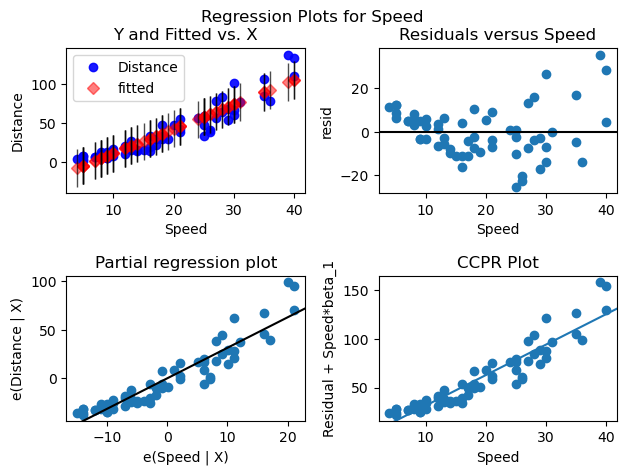

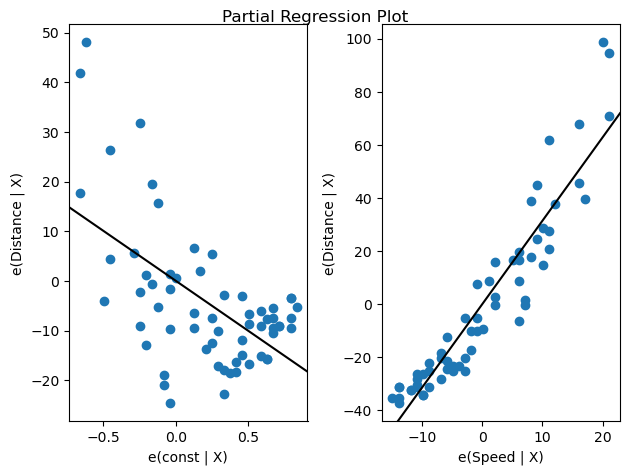

In [16]:
#Assumption: average value of the error is zero.
sm.graphics.plot_regress_exog(reg,"Speed")
plt.show()

## can just have all the partial regression plots together using:
## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

- looks like we have a slightly parabolic pattern in the residual-speed plot, indicating there may be a violation of the constant mean assumption

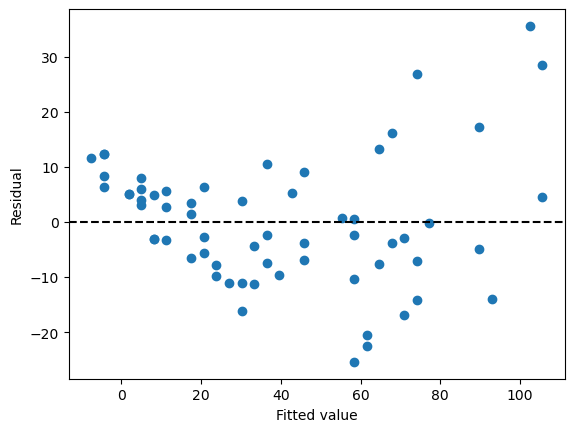

In [17]:
## variance is constant

## residual vs fitted plot 

#pull out fitted values from regression
fitted_y_3 = reg.fittedvalues

residuals_3 = reg.resid

plt.scatter(fitted_y_3,residuals_3)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

- The residual vs fitted plot also appears to have a slight parabolic (or V) pattern, indicating there may be a violation of the constant variance assumption

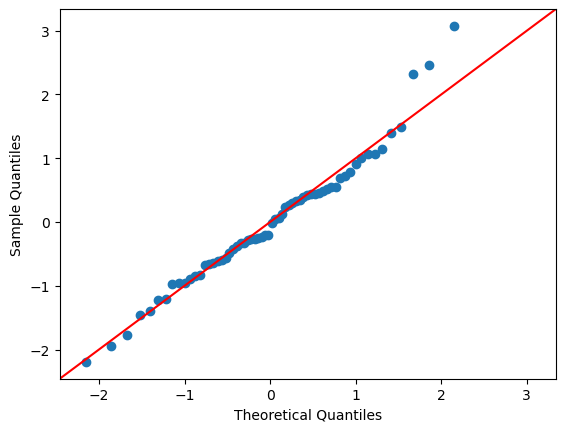

In [18]:
## Errors are normally distributed

## normal QQ plot

## pull out residuals from the model fitting
residuals_3 = reg.resid

sm.qqplot(residuals_3,fit=True, line="45")
plt.show()

- the normal QQ plot looks okay

From the diagnostic plots, we may have some indications that the assumptions on the error are violated: namely that the mean of the error is zero and that the variance is constant.  We may want to look in to some other methods to be able to work with this data.

As noted in the Galapogos example above, there are some variance stabilizing techniques (which are outside the scope of Math 360) that could be leveraged in this case to determine the appropriate transformations to the covariates and/or the response variable.  

In this case, a transformation to the output $Y$ of $Y^* = \sqrt{Y},$ yields a good correction - finding this transformation is outside the scope of the course.  To run this in python/Jupyter, we can define `Ynew = np.sqrt(speed['Distance'])`.  Try re-running the above example with the transformation on $Y$.

Some additional comments/things to include in the analysis:
- We may want to comment on the magnitude of $\beta_0$ and $\beta_1$, as well as the $R^2_{adj}$ value from the linear regression protocol.
- For this particular scenario, we may want to request more data from the insurance company -- $62$ observations is quite small, so obtaining a good regression is difficult.
- We may also be interested in a model that takes in to account various different road conditions, in which case, we would need more information and data from the insurance company to build that model. 

**Note** in the case of transformations to the input variables (i.e., the covariates), we can do this by adding a new column to the data frame, and then constructing the input matrix $X$ from the new columns.  E.g., let's say we wanted to transform $X1$ to $\ln X1$ and run a linear regression with $\ln X1$, $X2$, and $Y$.  If the dataframe is imported as data, then we would have:


`data['X1new'] = np.log(data['X1'])`

`X = data[['X1new','X2']]`

The first line adds a new column to the dataframe called `X1new` and the second line constructs the new input matrix.